# Difference of HSV in #happy and #sad images

HSV and HSL are descriptions of hue, saturation, and brightness/luminance, which are particularly useful for identifying contrast in images. These color spaces are frequently used in color selection tools in software and for web design.

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from skimage import io 
import numpy as np
%matplotlib inline
%load_ext memory_profiler
%load_ext line_profiler

## Prepare the image files
- The images are obtained using Instagram Scraper, a command-line application written in Python that scrapes and downloads an instagram user's photos and videos https://github.com/rarcega/instagram-scraper. 
```c
pip install instagram-scraper
instagram-scraper happy --tag -t image -m 800 -u <username> -p <login password>
```


In [79]:
# Read each .jpg file into a test file 

with open("sad_images.txt", "w") as a:
    for path, subdirs, files in os.walk(r'/Users/ceolwaerc/Dropbox/DAS_project/sad'):
        for filename in files:
            f = os.path.join(path, filename)
            a.write(str(f) + os.linesep)
            
with open("happy_images.txt", "w") as a:
    for path, subdirs, files in os.walk(r'/Users/ceolwaerc/Dropbox/DAS_project/happy'):
        for filename in files:
            f = os.path.join(path, filename)
            a.write(str(f) + os.linesep) 

https://realpython.com/python-opencv-color-spaces/

In [4]:
# Open the file of file names and put it in a list

with open('sad_images.txt', 'r') as f:
    sad_list = f.readlines()
sad_list = [x.strip('\n') for x in sad_list] 

with open('happy_images.txt', 'r') as f:
    happy_list = f.readlines()
happy_list = [x.strip('\n') for x in happy_list] 

### Compare different ways of reading images

In [25]:
%timeit np.array(Image.open(sad_list[0]))
%timeit mpimg.imread(sad_list[0])
%timeit cv2.imread(sad_list[0])
%timeit io.imread(sad_list[0])

16.4 ms ± 672 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
16.3 ms ± 518 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
18.5 ms ± 2.82 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
16.7 ms ± 1.31 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
print(np.array(Image.open(sad_list[0])).dtype)
print(mpimg.imread(sad_list[0]).dtype)
print(cv2.imread(sad_list[0]).dtype)
print(io.imread(sad_list[0]).dtype)

uint8
uint8
uint8
uint8


In [11]:
# img=mpimg.imread('baboon.png')
# img=cv2.imread('baboon.png')
img=mpimg.imread(sad_list[0])
# plt.imshow(img)
print(img.shape)

(621, 540, 3)


In [68]:
# Find the size of largest image(s)
sofar = 1000000
# sofar = 0
size_list = []
for item in sad_list:
# for item in happy_list:
    size = os.path.getsize(item)
    if size < sofar:
        sofar = size
        path = item
print(mpimg.imread(path).shape)


(320, 320, 3)


In [7]:
size_s = []
for i in sad_list: 
    size_S.append(mpimg.imread(i).shape)

In [41]:
size_h = []
for i in happy_list: 
    size_h.append(mpimg.imread(i).shape)

In [58]:
import seaborn as sns
from collections import Counter

sns.set()

def plt_hist(data):
    labels, values = zip(*Counter(data).items())
    indexes = np.arange(len(labels))
#     width = 200
    plt.bar(labels, values, width = 50000)
#     plt.xticks(indexes + width * 0.5, labels)
    plt.show()

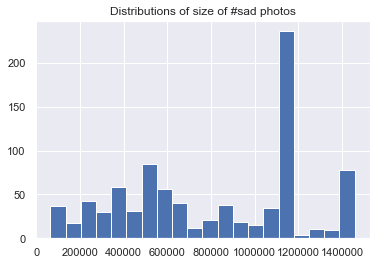

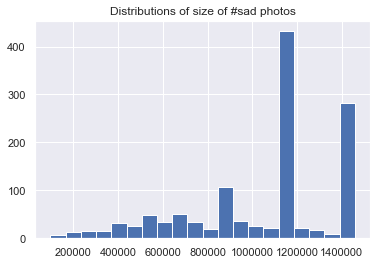

In [61]:
size_s = np.asarray(size_s)
wh_s = [i[0]*i[1] for i in size_s]
plt.hist(wh_s, bins = 20) 
plt.title("histogram") 
plt.show()

plt.figure()
size_h = np.asarray(size_h)
wh_h = [i[0]*i[1] for i in size_h]
plt.hist(wh_h, bins = 20) 
plt.title("Distributions of size of #happy photos") 
plt.show()

## Compare performance of code using different packages for converting RGB to HSV

In [5]:
def hsv_test(image_list, func_name, limit = 100):
    '''
    take an image list as an input and output a list 
    containing average hsv values for number of images
    
    :param image_list: name of an image list
    :param func_name: function name for hsv conversion
    :param limit: number of images
    
    :return hsv: list containing hsv values
    '''
    n = 0
    hsv = []
    for i in sad_list[0:limit]:
        img = mpimg.imread(i)
        img_hsv = func_name(img)
        hsv.append((np.mean(img_hsv[:,:,0]), np.mean(img_hsv[:,:,1]), np.mean(img_hsv[:,:,2])))
        n += 1
    return hsv

### Python

In [14]:
# %%file rgb_to_hsv_py.py
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# import numpy as np

# @profile
def rgb_to_hsv_py1(rgb):
    
    rgb = rgb.astype('float')
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2] # obtain r, g, b data
    width, height = rgb.shape[0], rgb.shape[1] # find the width and depth of the image
    h = np.zeros((width, height))
    s = np.zeros((width, height))
    v = np.zeros((width, height))
    hsv = np.zeros((width, height, 3))
    
    for i in range(0, width):
        for j in range(0, height):
            maxc = max(r[i,j], g[i,j], b[i,j])
            minc = min(r[i,j], g[i,j], b[i,j])
            df = maxc - minc 
            
            v[i, j] = maxc
            
            if maxc == minc:
                h[i, j] = 0
            elif maxc == r[i,j]: # red is max
                h[i, j] = ((g[i,j] - b[i,j]) / df)
            elif maxc == g[i,j]: # green is max
                h[i, j] = (2.0 + (b[i,j] - r[i,j]) /df)
            elif maxc == b[i,j]:
                h[i, j] = (4.0 + (r[i,j] - g[i,j]) /df)
                
            if maxc == 0:
                s[i, j] = 0
            else:
                s[i, j] = df / maxc
            
    hsv[:,:,0] = (h / 6.0) % 1.0
    hsv[:,:,1] = s
    hsv[:,:,2] = v
    return hsv

# img=mpimg.imread('test.jpg')
# hsv = rgb_to_hsv_py1(img)

In [10]:
%lprun -f rgb_to_hsv_py1 rgb_to_hsv_py1(img)

Timer unit: 1e-06 s

Total time: 3.51959 s
File: <ipython-input-4-27a2be2c0174>
Function: rgb_to_hsv_py1 at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def rgb_to_hsv_py1(rgb):
     2                                               
     3         1       6506.0   6506.0      0.2      rgb = rgb.astype('float')
     4         1         17.0     17.0      0.0      r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2] # obtain r, g, b data
     5         1          3.0      3.0      0.0      width, height = rgb.shape[0], rgb.shape[1] # find the width and depth of the image
     6         1        459.0    459.0      0.0      h = np.zeros((width, height))
     7         1        386.0    386.0      0.0      s = np.zeros((width, height))
     8         1        364.0    364.0      0.0      v = np.zeros((width, height))
     9         1         33.0     33.0      0.0      hsv = np.zeros((width, height, 3))
    10               

- time taken for accessing pixel level r,g,b total 59.3% of 3.51202s;
- 95% time in for loop
- time consuming steps: finding maximum, finding minimum, comparing values and division

In [76]:
!~/anaconda3/bin/python3 -m memory_profiler rgb_to_hsv_py.py

Filename: rgb_to_hsv_py.py

Line #    Mem usage    Increment   Line Contents
     5   76.984 MiB   76.984 MiB   @profile
     6                             def rgb_to_hsv_py1(rgb):
     7                                 
     8   84.664 MiB    7.680 MiB       rgb = rgb.astype('float')
     9   84.664 MiB    0.000 MiB       r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2] # obtain r, g, b data
    10   84.664 MiB    0.000 MiB       width, height = rgb.shape[0], rgb.shape[1] # find the width and depth of the image
    11   84.664 MiB    0.000 MiB       h = np.zeros((width, height))
    12   84.664 MiB    0.000 MiB       s = np.zeros((width, height))
    13   84.664 MiB    0.000 MiB       v = np.zeros((width, height))
    14   84.664 MiB    0.000 MiB       hsv = np.zeros((width, height, 3))
    15                                 
    16   92.324 MiB   -0.004 MiB       for i in range(0, width):
    17   92.324 MiB   -4.270 MiB           for j in range(0, height):
    18   92.324 MiB   -4.266 M

In [15]:
def rgb_to_hsv_py2(rgb):
    # access pixel level directly from the input 3D matrix
    rgb = rgb.astype('float')
    width, height = rgb.shape[0], rgb.shape[1] # find the width and depth of the image
    hsv = np.zeros((width, height, 3))
    
    for i in range(0, width):
        for j in range(0, height):
            maxc = max(rgb[i,j,0], rgb[i,j,1], rgb[i,j,2])
            minc = min(rgb[i,j,0], rgb[i,j,1], rgb[i,j,2])
            df = maxc - minc 
            
            hsv[i, j, 1] = maxc
            
            if maxc == minc:
                hsv[i, j, 0] = 0
            elif maxc == rgb[i,j,0]: # red is max
                hsv[i, j, 0] = ((rgb[i,j,1] - rgb[i,j,2]) / df)
            elif maxc == rgb[i,j,1]: # green is max
                hsv[i, j, 0] = (2.0 + (rgb[i,j,2] - rgb[i,j,0]) /df)
            elif maxc == rgb[i,j,2]:
                hsv[i, j, 0] = (4.0 + (rgb[i,j,0] - rgb[i,j,1]) /df)
                
            if maxc == 0:
                hsv[i, j, 1] = 0
            else:
                hsv[i, j, 1] = df / maxc
    return hsv

In [40]:
%lprun -f rgb_to_hsv_py2 rgb_to_hsv_py2(img)

Timer unit: 1e-06 s

Total time: 3.53235 s
File: <ipython-input-34-c1f6c8029d6e>
Function: rgb_to_hsv_py2 at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def rgb_to_hsv_py2(rgb):
     2                                               # access pixel level directly from the input 3D matrix
     3         1       2042.0   2042.0      0.1      rgb = rgb.astype('float')
     4         1          6.0      6.0      0.0      width, height = rgb.shape[0], rgb.shape[1] # find the width and depth of the image
     5         1       1556.0   1556.0      0.0      hsv = np.zeros((width, height, 3))
     6                                               
     7       622        374.0      0.6      0.0      for i in range(0, width):
     8    335961     165677.0      0.5      4.7          for j in range(0, height):
     9    335340     528601.0      1.6     15.0              maxc = max(rgb[i,j,0], rgb[i,j,1], rgb[i,j,2])
    10    

- time taken for accessing pixel level r,g,b total 61.6% of 3.53235s;
- 99% time in for loop
- similiar time consuming steps

In [11]:
def rgb_to_hsv_py3(rgb):
    # access pixel level directly from the input 3D matrix but for every fixel,
    # save the numbers
    rgb = rgb.astype('float')
    width, height = rgb.shape[0], rgb.shape[1] # find the width and depth of the image
    hsv = np.zeros((width, height, 3))    
    for i in range(0, width):
        for j in range(0,height):
            r = rgb[i,j,0]
            g = rgb[i,j,1]
            b = rgb[i,j,2]
            maxc = max(r, g, b)
            minc = min(r, g, b)
            df = maxc - minc 
            hsv[i, j, 2] = maxc

            if maxc == minc:
                hsv[i, j, 0] = 0.0
            elif maxc == rgb[i,j,0]: # red is max
                hsv[i, j, 0] = ((g - b) / df)
            elif maxc == rgb[i,j,1]: # green is max
                hsv[i, j, 0] = (2.0 + (b - r) /df)
            elif maxc == rgb[i,j,2]:
                hsv[i, j, 0] = (4.0 + (r - g) /df)
            hsv[i, j, 0] = (hsv[i, j, 0] / 6.0) % 1.0    
            if maxc == 0.0:
                hsv[i, j, 1] = 0.0
            else:
                hsv[i, j, 1] = df / maxc 
            
    return hsv
# rgb_to_hsv_py3(img)

In [12]:
%lprun -f rgb_to_hsv_py3 rgb_to_hsv_py3(img)

Timer unit: 1e-06 s

Total time: 4.12479 s
File: <ipython-input-11-d12a41e78aa4>
Function: rgb_to_hsv_py3 at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def rgb_to_hsv_py3(rgb):
     2                                               # access pixel level directly from the input 3D matrix but for every fixel,
     3                                               # save the numbers
     4         1       1782.0   1782.0      0.0      rgb = rgb.astype('float')
     5         1         16.0     16.0      0.0      width, height = rgb.shape[0], rgb.shape[1] # find the width and depth of the image
     6         1       1241.0   1241.0      0.0      hsv = np.zeros((width, height, 3))    
     7       622        412.0      0.7      0.0      for i in range(0, width):
     8    335961     187129.0      0.6      4.5          for j in range(0,height):
     9    335340     261403.0      0.8      6.3              r = rgb[i,j,0]


- time taken for accessing pixel level r,g,b total 18.6% of 4.12479s;
- 100% for loop
- less time to access rgbs but overall time taken is similar

In [16]:
%timeit rgb_to_hsv_py1(img)
%timeit rgb_to_hsv_py2(img)
%timeit rgb_to_hsv_py3(img)

1.06 s ± 40.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.28 s ± 192 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.46 s ± 463 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
%memit rgb_to_hsv_py1(img)
%memit rgb_to_hsv_py2(img)
%memit rgb_to_hsv_py3(img)

peak memory: 134.90 MiB, increment: 0.08 MiB
peak memory: 134.93 MiB, increment: 0.01 MiB
peak memory: 134.93 MiB, increment: 0.00 MiB


## Numpy

In [71]:
%%file rgb_to_hsv_np.py
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

@profile
def rgb_to_hsv_np(rgb):
    input_shape = rgb.shape
    rgb = rgb.reshape(-1, 3) 
    # np.reshape can take -1 as an argument, meaning 
    #"total array size divided by product of all other listed dimensions
    r, g, b = rgb[:, 0], rgb[:, 1], rgb[:, 2]
    
    maxc = np.maximum(np.maximum(r, g), b)
    minc = np.minimum(np.minimum(r, g), b)
    v = maxc
    
    deltac = maxc - minc
    s = deltac / maxc
    s = np.nan_to_num(s)
    
    deltac[deltac == 0] = 1.0  # to not divide by zero (those results in any way would be overridden in next lines)
    rc = (maxc - r) / deltac
    gc = (maxc - g) / deltac
    bc = (maxc - b) / deltac

    h = 4.0 + gc - rc
    h[g == maxc] = 2.0 + rc[g == maxc] - bc[g == maxc]
    h[r == maxc] = bc[r == maxc] - gc[r == maxc]
    h[minc == maxc] = 0.0

    h = (h / 6.0) % 1.0
    # concatenates along the third dimension
#     hsv = np.empty(rgb.shape)
#     hsv[:,0] = h
#     hsv[:,1] = s
#     hsv[:,2] = v
    hsv = np.dstack([h, s, v])
    return hsv.reshape(input_shape)

img=mpimg.imread('test.jpg')
hsv = rgb_to_hsv_np(img)

Overwriting rgb_to_hsv_np.py


In [45]:
%timeit rgb_to_hsv_np(img)
%memit rgb_to_hsv_np(img)

34.9 ms ± 4.34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
peak memory: 176.75 MiB, increment: 0.64 MiB


In [47]:
%lprun -f rgb_to_hsv_np rgb_to_hsv_np(img)

Timer unit: 1e-06 s

Total time: 0.040875 s
File: <ipython-input-43-d8a41f2b370d>
Function: rgb_to_hsv_np at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def rgb_to_hsv_np(rgb):
     2         1       1731.0   1731.0      4.2      rgb = rgb.astype('float')
     3         1          5.0      5.0      0.0      input_shape = rgb.shape
     4         1         10.0     10.0      0.0      rgb = rgb.reshape(-1, 3) 
     5                                               # np.reshape can take -1 as an argument, meaning 
     6                                               #"total array size divided by product of all other listed dimensions
     7         1          7.0      7.0      0.0      r, g, b = rgb[:, 0], rgb[:, 1], rgb[:, 2]
     8                                               
     9         1       3293.0   3293.0      8.1      maxc = np.maximum(np.maximum(r, g), b)
    10         1       3015.0   3015.0      7.

In [74]:
!~/anaconda3/bin/python3 -m memory_profiler rgb_to_hsv_np.py

Filename: rgb_to_hsv_np.py

Line #    Mem usage    Increment   Line Contents
     5   76.988 MiB   76.988 MiB   @profile
     6                             def rgb_to_hsv_np(rgb):
     7   76.988 MiB    0.000 MiB       input_shape = rgb.shape
     8   76.992 MiB    0.004 MiB       rgb = rgb.reshape(-1, 3) 
     9                                 # np.reshape can take -1 as an argument, meaning 
    10                                 #"total array size divided by product of all other listed dimensions
    11   76.992 MiB    0.000 MiB       r, g, b = rgb[:, 0], rgb[:, 1], rgb[:, 2]
    12                                 
    13   77.320 MiB    0.328 MiB       maxc = np.maximum(np.maximum(r, g), b)
    14   77.641 MiB    0.320 MiB       minc = np.minimum(np.minimum(r, g), b)
    15   77.641 MiB    0.000 MiB       v = maxc
    16                                 
    17   77.648 MiB    0.008 MiB       deltac = maxc - minc
    18   81.562 MiB    3.914 MiB       s = deltac / maxc
    19   85.4

## Cython

In [3]:
%reload_ext cython

In [78]:
%%cython

import numpy as np
cimport cython
cimport numpy as c_np

# For matplotlib images, the image is read-only so we must declare the memory view with const c_np.uint8_t[:,:,:] img
# ref: DAS lab

def rgb_to_hsv_cy0(const c_np.uint8_t[:,:,:] rgb):
    # r, g, b values are first saved as two dimensional arrays first
    # pixel level r,g,b are fetched from the 2D arrays
    width = rgb.shape[0]
    height = rgb.shape[1]
    
    r = rgb[:,:,0]
    g = rgb[:,:,1]
    b = rgb[:,:,2]
    
    h = np.empty((width, height))
    s = np.empty((width, height))
    v = np.empty((width, height))
    
    hsv = np.empty((width, height, 3))

    for i in range(width):
        for j in range(height):
            maxc = max(r[i, j], g[i, j], b[i, j])
            minc = min(r[i, j], g[i, j], b[i, j])
            df = maxc - minc 
            
            v[i, j] = maxc
            
            if maxc == minc:
                h[i, j] = 0
            elif maxc == r[i, j]: # red is max
                h[i, j] = ((g[i, j] - b[i, j]) / df)
            elif maxc == g[i, j]: # green is max
                h[i, j] = (2.0 + (b[i, j] - r[i, j]) /df)
            elif maxc == b[i, j]:
                h[i, j] = (4.0 + (r[i, j] - g[i, j]) /df)
            h[i, j] = (h[i, j] / 6.0) % 1.0    
            if maxc == 0:
                s[i, j] = 0
            else:
                s[i, j] = df / maxc
    
    return hsv

In [79]:
%%cython

import numpy as np
cimport cython
cimport numpy as c_np


def rgb_to_hsv_cycdef(const c_np.uint8_t[:,:,:] rgb):
    
    # adding cdef 
    
    cdef int width = rgb.shape[0]
    cdef int height = rgb.shape[1]
    
    cdef const c_np.uint8_t[:,:] r = rgb[:,:,0]
    cdef const c_np.uint8_t[:,:] g = rgb[:,:,1]
    cdef const c_np.uint8_t[:,:] b = rgb[:,:,2]
    
    cdef double[:,:] h = np.empty((width, height))
    cdef double[:,:] s = np.empty((width, height))
    cdef double[:,:] v = np.empty((width, height))
    
    cdef double[:,:,:] hsv = np.empty((width, height, 3))
    cdef int i, j
    cdef double maxc, minc, df
    
    for i in range(width):
        for j in range(height):
            maxc = max(r[i, j], g[i, j], b[i, j])
            minc = min(r[i, j], g[i, j], b[i, j])
            df = maxc - minc 
            
            v[i, j] = maxc
            
            if maxc == minc:
                h[i, j] = 0
            elif maxc == r[i, j]: # red is max
                h[i, j] = ((g[i, j] - b[i, j]) / df)
            elif maxc == g[i, j]: # green is max
                h[i, j] = (2.0 + (b[i, j] - r[i, j]) /df)
            elif maxc == b[i, j]:
                h[i, j] = (4.0 + (r[i, j] - g[i, j]) /df)
            h[i, j] = (h[i, j] / 6.0) % 1.0    
            if maxc == 0:
                s[i, j] = 0
            else:
                s[i, j] = df / maxc
    
    return hsv

In [112]:
%timeit rgb_to_hsv_cy0(img)
%timeit rgb_to_hsv_cycdef(img)

1.24 s ± 96.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.36 ms ± 160 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%%cython -a

import numpy as np
cimport cython
cimport numpy as c_np
from cython.parallel import prange
@cython.boundscheck(False)
@cython.wraparound(False)

def rgb_to_hsv_cy1(const c_np.uint8_t[:,:,:] rgb):
    
    # adding prange and compiler directives
    
    cdef int width = rgb.shape[0]
    cdef int height = rgb.shape[1]
    
    cdef const c_np.uint8_t[:,:] r = rgb[:,:,0]
    cdef const c_np.uint8_t[:,:] g = rgb[:,:,1]
    cdef const c_np.uint8_t[:,:] b = rgb[:,:,2]
    
    cdef double[:,:] h = np.empty((width, height))
    cdef double[:,:] s = np.empty((width, height))
    cdef double[:,:] v = np.empty((width, height))
    
    cdef double[:,:,:] hsv = np.empty((width, height, 3))
    cdef int i, j
    cdef double maxc, minc, df
    
    for i in prange(0,width,nogil=True):
        for j in prange(0,height):
            maxc = max(r[i, j], g[i, j], b[i, j])
            minc = min(r[i, j], g[i, j], b[i, j])
            df = maxc - minc 
            
            v[i, j] = maxc
            
            if maxc == minc:
                h[i, j] = 0
            elif maxc == r[i, j]: # red is max
                h[i, j] = ((g[i, j] - b[i, j]) / df)
            elif maxc == g[i, j]: # green is max
                h[i, j] = (2.0 + (b[i, j] - r[i, j]) /df)
            elif maxc == b[i, j]:
                h[i, j] = (4.0 + (r[i, j] - g[i, j]) /df)
            h[i, j] = (h[i, j] / 6.0) % 1.0    
            if maxc == 0:
                s[i, j] = 0
            else:
                s[i, j] = df / maxc
    
    return hsv

In [ ]:
%timeit hsv_test(sad_list, rgb_to_hsv_cy0, 1)
%timeit hsv_test(sad_list, rgb_to_hsv_cycdef, 10)
%timeit hsv_test(sad_list, rgb_to_hsv_cycd, 10)
%timeit hsv_test(sad_list, rgb_to_hsv_cy1, 10)

In [10]:
%%cython

import numpy as np
cimport cython
cimport numpy as c_np
from cython.parallel import prange
@cython.boundscheck(False)
@cython.wraparound(False)

def rgb_to_hsv_cy2(const c_np.uint8_t[:,:,:] rgb):
    
    # access pixel level directly from the imput 3D matrix

    cdef int width = rgb.shape[0]
    cdef int height = rgb.shape[1]
    cdef double[:,:,:] hsv = np.empty((width, height, 3),dtype="double")
    cdef int i, j
    cdef double maxc, minc, df
    
    for i in prange(0,width,nogil=True):
        for j in prange(0,height):
            
            maxc = max(rgb[i,j,0], rgb[i,j,1], rgb[i,j,2])
            minc = min(rgb[i,j,0], rgb[i,j,1], rgb[i,j,2])
            df = maxc - minc 
            
            hsv[i, j, 2] = maxc
            
            if maxc == minc:
                hsv[i, j, 0] = 0.0
            elif maxc == rgb[i,j,0]: # red is max
                hsv[i, j, 0] = ((rgb[i,j,1] - rgb[i,j,2]) / df)
            elif maxc == rgb[i,j,1]: # green is max
                hsv[i, j, 0] = (2.0 + (rgb[i,j,2] - rgb[i,j,0]) /df)
            elif maxc == rgb[i,j,2]:
                hsv[i, j, 0] = (4.0 + (rgb[i,j,0] - rgb[i,j,1]) /df)
            hsv[i, j, 0] = (hsv[i, j, 0] / 6.0) % 1.0    
            if maxc == 0.0:
                hsv[i, j, 1] = 0.0
            else:
                hsv[i, j, 1] = df / maxc
    
    return hsv

In [5]:
%%cython -a
# cython: profile=True
# distutils: extra_compile_args=-fopenmp
# distutils: extra_link_args=-fopenmp

import numpy as np
cimport cython
cimport numpy as c_np
from cython.parallel import prange

@cython.boundscheck(False)
@cython.wraparound(False)
def rgb_to_hsv_cy3(const c_np.uint8_t[:,:,:] rgb):
    # access pixel level directly from the imput 3D matrix but for every fixel,
    # save the numbers
    
    cdef int width = rgb.shape[0]
    cdef int height = rgb.shape[1]
    cdef double[:,:,:] hsv = np.empty((width, height, 3),dtype="double")
    cdef int i, j
    cdef double maxc, minc, df
#     cdef double r, g, b
    cdef float r, g, b

    for i in prange(0,width,nogil=True):
        for j in prange(0,height):
            r = rgb[i,j,0]
            g = rgb[i,j,1]
            b = rgb[i,j,2]
            maxc = max(r, g, b)
            minc = min(r, g, b)
            df = maxc - minc 
            hsv[i, j, 2] = maxc
            
            if maxc == minc:
                hsv[i, j, 0] = 0.0
            elif maxc == rgb[i,j,0]: # red is max
                hsv[i, j, 0] = ((g - b) / df)
            elif maxc == rgb[i,j,1]: # green is max
                hsv[i, j, 0] = (2.0 + (b - r) /df)
            elif maxc == rgb[i,j,2]:
                hsv[i, j, 0] = (4.0 + (r - g) /df)
            hsv[i, j, 0] = (hsv[i, j, 0] / 6.0) % 1.0    
            if maxc == 0.0:
                hsv[i, j, 1] = 0.0
            else:
                hsv[i, j, 1] = df / maxc 

    return hsv

In [147]:
%prun rgb_to_hsv_cy3(img)

In [119]:
%timeit rgb_to_hsv_cy1(img)
%timeit rgb_to_hsv_cy2(img)
%timeit rgb_to_hsv_cy3(img)

6.55 ms ± 338 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.23 ms ± 623 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.16 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [125]:
%timeit -n 10 -r 3 hsv_test(sad_list, rgb_to_hsv_cy1, 1)
%timeit -n 10 -r 3 hsv_test(sad_list, rgb_to_hsv_cy1, 2)
%timeit -n 10 -r 3 hsv_test(sad_list, rgb_to_hsv_cy1, 4)
%timeit -n 10 -r 3 hsv_test(sad_list, rgb_to_hsv_cy1, 8)
%timeit -n 10 -r 3 hsv_test(sad_list, rgb_to_hsv_cy1, 16)
%timeit -n 10 -r 3 hsv_test(sad_list, rgb_to_hsv_cy1, 32)
%timeit -n 10 -r 3 hsv_test(sad_list, rgb_to_hsv_cy1, 64)
%timeit -n 10 -r 3 hsv_test(sad_list, rgb_to_hsv_cy1, 128)

26.6 ms ± 2.11 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)
106 ms ± 4.93 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


210 ms ± 13.3 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


444 ms ± 47.2 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


863 ms ± 66 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


1.76 s ± 59.4 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


3.63 s ± 144 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


7.58 s ± 174 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [140]:
%timeit -n 10 -r 3 hsv_test(sad_list, rgb_to_hsv_cy2, 1)
%timeit -n 10 -r 3 hsv_test(sad_list, rgb_to_hsv_cy2, 2)
%timeit -n 10 -r 3 hsv_test(sad_list, rgb_to_hsv_cy2, 4)
%timeit -n 10 -r 3 hsv_test(sad_list, rgb_to_hsv_cy2, 8)
%timeit -n 10 -r 3 hsv_test(sad_list, rgb_to_hsv_cy2, 16)
%timeit -n 10 -r 3 hsv_test(sad_list, rgb_to_hsv_cy2, 32)
%timeit -n 10 -r 3 hsv_test(sad_list, rgb_to_hsv_cy2, 64)
%timeit -n 10 -r 3 hsv_test(sad_list, rgb_to_hsv_cy2, 128)

27.3 ms ± 3.53 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)
106 ms ± 9.33 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)
181 ms ± 6.97 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)
405 ms ± 31.4 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)
763 ms ± 15.7 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)
1.7 s ± 65.1 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)
3.26 s ± 103 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)
6.24 s ± 28.9 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [141]:
%timeit -n 10 -r 3 hsv_test(sad_list, rgb_to_hsv_cy3, 1)
%timeit -n 10 -r 3 hsv_test(sad_list, rgb_to_hsv_cy3, 2)
%timeit -n 10 -r 3 hsv_test(sad_list, rgb_to_hsv_cy3, 4)
%timeit -n 10 -r 3 hsv_test(sad_list, rgb_to_hsv_cy3, 8)
%timeit -n 10 -r 3 hsv_test(sad_list, rgb_to_hsv_cy3, 16)
%timeit -n 10 -r 3 hsv_test(sad_list, rgb_to_hsv_cy3, 32)
%timeit -n 10 -r 3 hsv_test(sad_list, rgb_to_hsv_cy3, 64)
%timeit -n 10 -r 3 hsv_test(sad_list, rgb_to_hsv_cy3, 128)

25.6 ms ± 2.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
94.9 ms ± 3.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
180 ms ± 7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
368 ms ± 4.77 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
726 ms ± 5.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.53 s ± 19.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
3.11 s ± 8.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
6.34 s ± 222 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### Check correctness of the functions

In [86]:
py = rgb_to_hsv_py1(img)
nb = rgb_to_hsv_np(img)
cy1 = rgb_to_hsv_cy1(img)
cy2 = rgb_to_hsv_cy2(img)
cy3 = rgb_to_hsv_cy3(img)
print(np.mean(py[:,:,0]), np.mean(py[:,:,1]), np.mean(py[:,:,2]))
print(np.mean(nb[:,:,0]), np.mean(nb[:,:,1]), np.mean(nb[:,:,2]))
print(np.mean(cy1[:,:,0]), np.mean(cy1[:,:,1]), np.mean(cy1[:,:,2]))
print(np.mean(cy2[:,:,0]), np.mean(cy2[:,:,1]), np.mean(cy2[:,:,2]))
print(np.mean(cy3[:,:,0]), np.mean(cy3[:,:,1]), np.mean(cy3[:,:,2]))

0.41635692136828256 0.46385288491915905 136.35681397984135
0.41635692136828256 0.46385288491915905 136.35681397984135
0.41635692136828256 0.46385288491915905 136.35681397984135
0.41635692136828256 0.46385288491915905 136.35681397984135
0.41635692136828256 0.46385288491915905 136.35681397984135


## Not needed after changing flaot[:, :, :] rgb to const c_np.uint8_t[:,:,:] rgb
The python and the numba function return exactly the same result and the cython2 result is different but negligible ($10^{-11}$). 

Essentially every floating-point operation (add, subtract, multiply, divide, using any “elementary” function such as square root, cosine, logarithm, and so on), some rounding error may be added. For the basic arithmetic operations, the result is calculated as if the exact mathematical result were calculated and then rounded to the nearest representable floating-point value. Ideally, the elementary functions would behave this way too, but most implementations have some additional error, because calculating these functions precisely is difficult.

As an example, consider calculating 1/3*18 using decimal floating-point with four digits. 1 and 3 in decimal floating-point have no error; they are representable as 1.000 and 3.000. But their quotient, ⅓, is not representable. When you do the division, the result is .3333.... Then, when you multiply .3333 by 18, the exact result is 5.999...4. The floating-point format has only sixteen digits, we have to round this to some number we can represent. The nearest representable value is 5.999...9, so that is returned.

Cython automatically coerces C floating point values back to Python "float" 
objects at need, and Python's "float" otherwise behaves exactly like C's 
"double". So change "float" into "double" will solve the problem

In [42]:
%%cython

def test_cy1(float a):
    print(a*18.0)
def test_cy2(double a):
    print(a*18.0)
    
test_cy1(1.0 / 3.0)    
test_cy2(1.0 / 3.0)
print(1.0 / 3.0 *18.0)

6.000000178813934
6.0
6.0


#### Compare the three in terms of speed

In [173]:
%lprun -f hsv_test hsv_test(sad_list, rgb_to_hsv_cy1, 8)

In [57]:
## Uncomment to run the code. WARNING: it takes a very long time to run

# %timeit -n 5 hsv_test(sad_list, rgb_to_hsv_py, 1)
# %timeit -n 5 hsv_test(sad_list, rgb_to_hsv_py, 2)
# %timeit -n 5 hsv_test(sad_list, rgb_to_hsv_py, 4)
# %timeit -n 5 hsv_test(sad_list, rgb_to_hsv_py, 8)

1.45 s ± 38.4 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)
6.22 s ± 119 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)
10.7 s ± 315 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)
23.9 s ± 1.37 s per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [99]:
%timeit -n 5 hsv_test(sad_list, rgb_to_hsv_np, 1)
%timeit -n 5 hsv_test(sad_list, rgb_to_hsv_np, 2)
%timeit -n 5 hsv_test(sad_list, rgb_to_hsv_np, 4)
%timeit -n 5 hsv_test(sad_list, rgb_to_hsv_np, 8)

49.6 ms ± 8.36 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


232 ms ± 10.3 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


508 ms ± 9.68 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


1.15 s ± 77.9 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [145]:
%memit hsv_test(sad_list, rgb_to_hsv_py1, 5)
%memit hsv_test(sad_list, rgb_to_hsv_py2, 5)
%memit hsv_test(sad_list, rgb_to_hsv_py3, 5)
%memit hsv_test(sad_list, rgb_to_hsv_np, 5)
%memit hsv_test(sad_list, rgb_to_hsv_cy1, 5)
%memit hsv_test(sad_list, rgb_to_hsv_cy2, 5)
%memit hsv_test(sad_list, rgb_to_hsv_cy3, 5)

peak memory: 388.16 MiB, increment: 102.10 MiB
peak memory: 383.55 MiB, increment: 0.00 MiB
peak memory: 380.39 MiB, increment: 8.79 MiB


/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


peak memory: 449.81 MiB, increment: 78.50 MiB
peak memory: 340.13 MiB, increment: 20.73 MiB
peak memory: 336.80 MiB, increment: 0.00 MiB
peak memory: 310.78 MiB, increment: 11.45 MiB


In [ ]:
hsv_test(sad_list, rgb_to_hsv_py1, 5)

## Multiprocessing

In [16]:
import datetime
from multiprocessing import Pool

def read_convert(filename):
#     import cv2
    hsv = []
    img = mpimg.imread(filename)
    img = rgb_to_hsv_cy3(img)
    hsv.append((np.mean(img[:,:,0]), np.mean(img[:,:,1]), np.mean(img[:,:,2])))
    return hsv

In [15]:
# Using cy1
t = []
for n in [1,2,4,8,16,32,64,128]:
    start = datetime.datetime.now()
    # multiprocessing.set_start_method('spawn')
    p = Pool(4)
    result = p.map(read_convert, sad_list[:n])
    t = datetime.datetime.now() - start
    print(t)
    p.close()

0:00:00.107778
0:00:00.172516
0:00:00.244665
0:00:00.323962


/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


0:00:00.518260


/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


0:00:00.990363


/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


0:00:02.040358


/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/Users/ceolwaerc/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarnin

0:00:04.235079


In [12]:
# Using cy2
t = []
for n in [1,2,4,8,16,32,64,128]:
    start = datetime.datetime.now()
    # multiprocessing.set_start_method('spawn')
    p = Pool(4)
    result = p.map(read_convert, sad_list[:n])
    t = datetime.datetime.now() - start
    print(t)
    p.close()

0:00:00.094894
0:00:00.213193
0:00:00.250442
0:00:00.308402
0:00:00.428068
0:00:00.811446
0:00:01.482295
0:00:02.970162


In [17]:
# Using cy3
t = []
for n in [1,2,4,8,16,32,64,128]:
    start = datetime.datetime.now()
    # multiprocessing.set_start_method('spawn')
    p = Pool(4)
    result = p.map(read_convert, sad_list[:n])
    t = datetime.datetime.now() - start
    print(t)
    p.close()

0:00:00.113531
0:00:00.253040
0:00:00.295195
0:00:00.501686
0:00:01.115757
0:00:01.827033
0:00:03.367458
0:00:07.243254


cython https://www.pyimagesearch.com/2017/08/28/fast-optimized-for-pixel-loops-with-opencv-and-python/

## Benchmarking

In [19]:
import pandas as pd
df = pd.DataFrame(columns = ['py','nb','cy1','cy2','cy3','pool1', 'pool2','pool2',], index = [0, 1,2,4,8,16,32,64,128])
df['py'] = [0, 1450, 6220, 10700, 23900, 'nan','nan','nan','nan']
df['nb'] = [0, 49.6,232,508,1150, 'nan','nan','nan','nan']
df['cy1'] = [0, 20.6, 106, 210, 444, 863, 1760, 3630, 7580]
df['cy2'] = [0, 27.3, 106, 181, 405, 763, 1700, 3260, 6240]
df['cy3'] = [0, 25.6, 94.9, 180, 368, 726, 1530, 3100, 6340]
df['pool1'] = [0, 107.8, 172.5, 244.7, 324, 518.3, 990.4, 2040.4, 4235.1]
df['pool2'] = [0, 94.9, 213.2, 250.4, 308.4, 428.1, 811.4, 1482.3, 2970.2]
df['pool3'] = [0, 113.5, 253, 295.2, 501.7, 1115.8, 1827.0, 3367.5, 7243.3]

display(df)

,py,nb,cy1,cy2,cy3,pool1,pool2,pool2,pool3
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1450,49.6,20.6,27.3,25.6,107.8,94.9,94.9,113.5
2,6220,232,106.0,106.0,94.9,172.5,213.2,213.2,253.0
4,10700,508,210.0,181.0,180.0,244.7,250.4,250.4,295.2
8,23900,1150,444.0,405.0,368.0,324.0,308.4,308.4,501.7
16,nan,nan,863.0,763.0,726.0,518.3,428.1,428.1,1115.8
32,nan,nan,1760.0,1700.0,1530.0,990.4,811.4,811.4,1827.0
64,nan,nan,3630.0,3260.0,3100.0,2040.4,1482.3,1482.3,3367.5
128,nan,nan,7580.0,6240.0,6340.0,4235.1,2970.2,2970.2,7243.3


Text(0.5, 0, 'Number of data points')

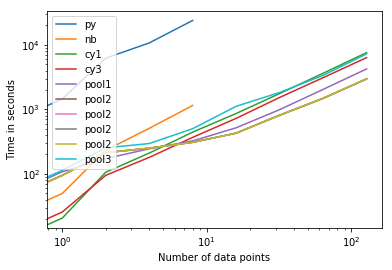

In [30]:
plt.figure()#figsize=(10,5))
for i in df.columns[:3]:
    plt.plot(df.index, df[i], label = i)
for i in df.columns[4:]:
    plt.plot(df.index, df[i], label = i)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Time in seconds")
plt.xlabel("Number of data points")

In [95]:
start = datetime.datetime.now()
# multiprocessing.set_start_method('spawn')
# create a Pool with number of processes as many as CPU cores
p = Pool(4)
result = p.map(read_convert, sad_list[:1])
t = datetime.datetime.now() - start
print(t)
p.close()
# print(t)

0:00:00.104143


In [33]:
import random 
sad_mean = []
happy_mean = []
for n in range(50):
#     start = datetime.datetime.now()
    # multiprocessing.set_start_method('spawn')
    p = Pool(4)
    sad_mean.append(np.mean(p.map(read_convert, random.sample(sad_list, 100)), axis=0))
    happy_mean.append(np.mean(p.map(read_convert, random.sample(happy_list, 100)), axis=0))
#     t = datetime.datetime.now() - start
#     print(t)
    p.close()
# print(t)

<function matplotlib.pyplot.show(*args, **kw)>

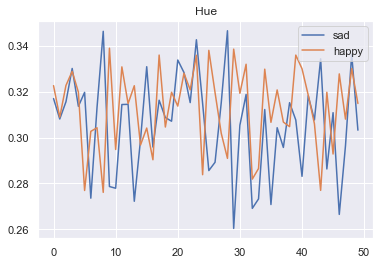

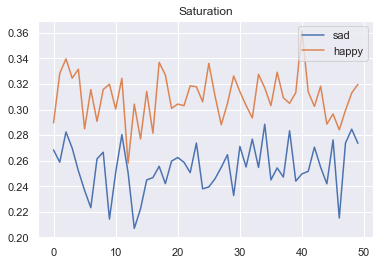

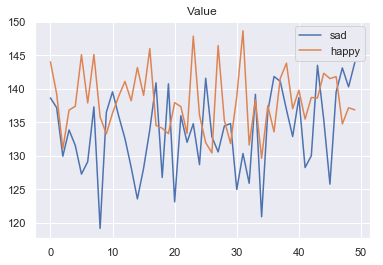

In [31]:
sad_h = [i[0][0] for i in sad_mean]
sad_s = [i[0][1] for i in sad_mean]
sad_v = [i[0][2] for i in sad_mean]

happy_h = [i[0][0] for i in happy_mean]
happy_s = [i[0][1] for i in happy_mean]
happy_v = [i[0][2] for i in happy_mean]

plt.plot(sad_h, label = 'sad')
plt.plot(happy_h, label = 'happy')
plt.legend(loc = "upper right")
plt.title('Hue')
plt.show

plt.figure()
plt.plot(sad_s, label = 'sad')
plt.plot(happy_s, label = 'happy')
plt.title('Saturation')
plt.legend(loc = "upper right")
plt.show

plt.figure()
plt.plot(sad_v, label = 'sad')
plt.plot(happy_v, label = 'happy')
plt.title('Value')
plt.legend(loc = "upper right")
plt.show